# iMet Collection 2021 with Lightning ⚡

## Setup environment 

- connect the gDrive with dataset
- extract data to local
- install pytorch lightning

In [2]:
%reload_ext autoreload
%autoreload

In [3]:
from google.colab import drive

# connect to  my gDrive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# copy the dataset to local drive
#! rsync -ah --progress /content/gdrive/Shareddrives/Datasets/Kaggle/iMet/imet-2021-fgvc8.zip imet.zip

In [4]:
! rm -rf imet-2021-fgvc8/train-1/
! rm -rf imet-2021-fgvc8/test/

# extract dataset to the drive
! unzip /content/gdrive/Shareddrives/Datasets/Kaggle/iMet/imet-2021-fgvc8.zip -d imet-2021-fgvc8 | awk 'BEGIN {ORS=" "} {if(NR%500==0)print "."}'
! ls -l

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . total 12
drwx------ 6 root root 4096 Jun 11 08:01 gdrive
drwxr-xr-x 4 root root 4096 Jun 11 08:19 imet-2021-fgvc8
drwxr-xr-x 1 root root 4096 Jun  1 13:40 sample_data


In [1]:
! pip install -q -U pytorch-lightning torchmetrics timm
! pip uninstall -y kaggle-imet
! pip install -q https://github.com/Borda/kaggle_iMet-collection/archive/main.zip

# import os
# os.kill(os.getpid(), 9)
! pip list | grep torch
! pip list | grep kaggle

Uninstalling kaggle-imet-0.1.1:
  Successfully uninstalled kaggle-imet-0.1.1
pytorch-lightning             1.3.5              
torch                         1.8.1+cu101        
torchmetrics                  0.3.2              
torchsummary                  1.5.1              
torchtext                     0.9.1              
torchvision                   0.9.1+cu101        
kaggle                        1.5.12             
kaggle-imet                   0.1.1              


In [2]:
! nvidia-smi

Fri Jun 11 18:28:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    23W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Data Exploration

Checking what data do we have available...

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

PATH_DATASET = "/content/imet-2021-fgvc8/"
pd.read_csv(PATH_DATASET + "train-from-kaggle.csv").head()

,id,attribute_ids
0,000040d66f14ced4cdd18cd95d91800f,448 2429 782
1,0000ef13e37ef70412166725ec034a8a,2997 3231 2730 3294 3099 2017 784
2,0001eeb4a06e8daa7c6951bcd124c3c7,2436 1715 23
3,000226398d224de78b191e6db45fd94e,2997 3433 448 782
4,00029c3b0171158d63b1bbf803a7d750,3465 3322 3170 1553 781


## Dataset & DataModule

Creating standard PyTorch dataset to define how the data shall be loaded and set representations. We define the sample pair as:
- RGB image
- one-hot lable encding

A DataModule standardizes the training, val, test splits, data preparation and transforms. The main advantage is consistent data splits, data preparation and transforms across models.

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


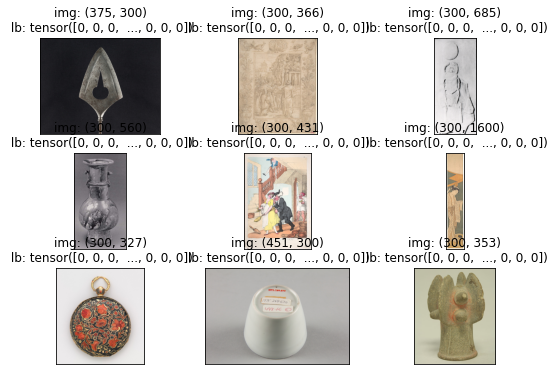

In [4]:
import matplotlib.pyplot as plt
from PIL import ImageFile

from kaggle_imgclassif.imet_collect.data import IMetDataset

ImageFile.LOAD_TRUNCATED_IMAGES = True

dataset = IMetDataset(
    df_data=PATH_DATASET + "train-from-kaggle.csv",
    path_img_dir=PATH_DATASET + "train-1/train-1",
)

# quick view
fig = plt.figure(figsize=(9, 6))
for i in range(9):
    img, lb = dataset[i]
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img)
    ax.set_title(f"img: {img.size}\n lb: {lb}")

100%|██████████| 4/4 [01:03<00:00, 19.41s/it]

nb labels: 101


batch labels: [3, 2, 3, 4, 10, 7, 11, 1, 5, 15, 1, 17, 5, 1, 3, 3, 3, 2, 2, 2, 4, 3, 6, 7, 3, 9, 17, 14, 16, 14, 3, 6, 21, 6, 19, 2, 4, 3, 4, 1, 7, 4, 6, 5, 1, 1, 3, 2, 5, 4, 5, 1, 10, 1, 4, 4, 5, 6, 4, 4, 4, 4, 26, 2, 14, 3, 1, 2, 1, 4, 13, 10, 4, 26, 5, 19, 10, 17, 2, 2, 3, 2, 31, 39, 38, 24, 39, 5, 1, 4, 7, 5]
image size: torch.Size([3, 224, 224])


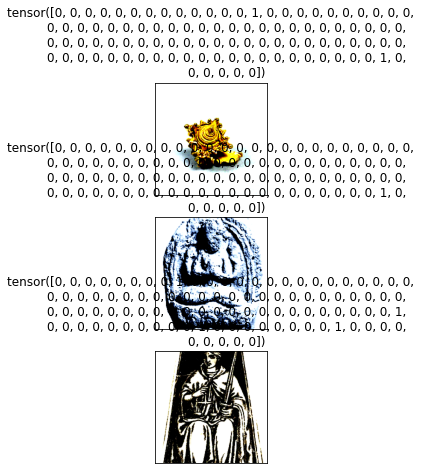

In [5]:
import torch

from kaggle_imgclassif.imet_collect.data import TORCHVISION_TRAIN_TRANSFORM, TORCHVISION_VALID_TRANSFORM, IMetDM

dm = IMetDM(
    base_path=PATH_DATASET,
    path_csv="train-from-kaggle_min-lb-sample-1000.csv",
    batch_size=228,
    train_transforms=TORCHVISION_TRAIN_TRANSFORM,
    valid_transforms=TORCHVISION_VALID_TRANSFORM,
    # num_workers=0,
)
dm.setup()
print(f"nb labels: {dm.num_classes}")

# Quick view
fig = plt.figure(figsize=(3, 7))
for imgs, lbs in dm.val_dataloader():
    batch_lb_sum = torch.sum(lbs, axis=0).numpy()
    print(f"batch labels: {list(batch_lb_sum[batch_lb_sum > 0])}")
    print(f"image size: {imgs[0].shape}")
    for i in range(3):
        ax = fig.add_subplot(3, 1, i + 1, xticks=[], yticks=[])
        # print(np.rollaxis(imgs[i].numpy(), 0, 3).shape)
        ax.imshow(np.rollaxis(imgs[i].numpy(), 0, 3))
        ax.set_title(lbs[i])
    break

## CNN Model

We start with some stanrd CNN models taken from torch vision. Then we define Ligthning module including training and validation step and configure optimizer/schedular.

In [6]:
import timm

from kaggle_imgclassif.imet_collect.models import LitMet, LitResnet

# see: https://pytorch.org/vision/stable/models.html
# net = timm.create_model('vit_base_resnet50d_224', pretrained=True, num_classes=dm.num_classes)
net = timm.create_model("vit_base_patch16_224", pretrained=True, num_classes=dm.num_classes)
# print(net)

model = LitMet(model=net, num_classes=dm.num_classes, name="imet", lr=1e-3)

In [7]:
# import gc, torch
# del net
# del model
# gc.collect()
# torch.cuda.empty_cache()

## Training

We use Pytorch Lightning which allow us to drop all the boilet plate code and simplify all training just to use/call Trainer...

In [ ]:
import gc

import pytorch_lightning as pl

print(pl.__version__)

logger = pl.loggers.CSVLogger(save_dir="logs/", name=model.name)
swa = pl.callbacks.StochasticWeightAveraging(swa_epoch_start=0.6)
ckpt = pl.callbacks.ModelCheckpoint(
    monitor="valid_f1",
    save_top_k=1,
    save_last=True,
    # save_weights_only=True,
    filename="checkpoint/{epoch:02d}-{valid_acc:.4f}-{valid_f1:.4f}",
    # verbose=False,
    mode="max",
)

# ==============================

trainer = pl.Trainer(
    # fast_dev_run=True,
    gpus=1,
    # accelerator='ddp_spawn',
    callbacks=[ckpt, swa],
    logger=logger,
    max_epochs=10,
    precision=16,
    # overfit_batches=5,
    auto_lr_find=True,
    accumulate_grad_batches=24,
    val_check_interval=0.25,
    progress_bar_refresh_rate=1,
    weights_summary="top",
)
gc.collect()
torch.cuda.empty_cache()

# ==============================

# lr_find_kwargs = dict(min_lr=1e-5, max_lr=1e-2, num_training=25)
# trainer.tune(model, datamodule=dm, lr_find_kwargs=lr_find_kwargs)
# print(f"LR: {model.learning_rate}")

# ==============================

# dm.train_dataset.transforms = TORCHVISION_TRAIN_TRANSFORM
# dm.valid_dataset.transforms = TORCHVISION_VALID_TRANSFORM
dm.batch_size = 64
trainer.fit(model=model, datamodule=dm)

Quick visualization of the training process...

   valid_loss  valid_acc  valid_prec  ...  train_acc  train_prec  train_f1
0    0.123066   0.969430     0.00000  ...        NaN         NaN       NaN
1    0.120446   0.969430     0.00000  ...        NaN         NaN       NaN
2         NaN        NaN         NaN  ...   0.969678         0.0       0.0
3    0.121142   0.968843     0.00184  ...        NaN         NaN       NaN
4    0.116868   0.969430     0.00000  ...        NaN         NaN       NaN

[5 rows x 10 columns]


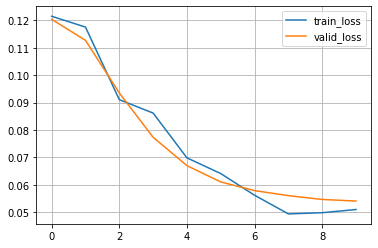

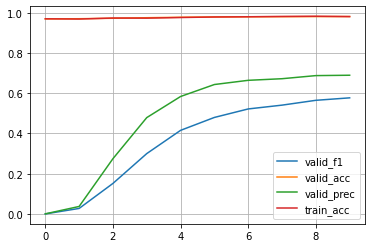

In [10]:
metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
print(metrics.head())

aggreg_metrics = []
agg_col = "epoch"
for i, dfg in metrics.groupby(agg_col):
    agg = dict(dfg.mean())
    agg[agg_col] = i
    aggreg_metrics.append(agg)

df_metrics = pd.DataFrame(aggreg_metrics)
df_metrics[["train_loss", "valid_loss"]].plot(grid=True, legend=True)
df_metrics[["valid_f1", "valid_acc", "valid_prec", "train_acc"]].plot(grid=True, legend=True)

## Predictions

In [ ]:
import sys

np.set_printoptions(threshold=sys.maxsize)

for imgs, names in dm.val_dataloader():
    with torch.no_grad():
        encoding = model.cuda()(imgs.cuda()).cpu()
    print(np.round(encoding.detach().numpy(), decimals=2))
    break

for imgs, lbs in dm.val_dataloader():
    print(np.round(lbs.to(encoding.dtype).numpy(), decimals=2))
    break

In [ ]:
import os

import tqdm

preds = []
dm.batch_size = 128
model.cuda().eval()

pbar = tqdm.tqdm(total=len(dm.test_dataset))
for imgs, names in dm.test_dataloader():
    with torch.no_grad():
        encoding = model(imgs.cuda()).cpu()
    # print(np.round(encoding.detach().numpy(), decimals=2))
    for oh, name in zip(encoding, names):
        lbs = dm.binary_encoding_to_labels(oh)
        preds.append({"id": os.path.splitext(name)[0], "attribute_ids": " ".join(lbs)})
    # break
    pbar.update(len(names))

df_preds = pd.DataFrame(preds)
print(df_preds.head())
print(len(df_preds))
df_preds.to_csv("submission.csv", index=False)

In [13]:
# df_preds = pd.DataFrame(preds)
df_base = pd.DataFrame(dm.test_table)
df_base["id"] = [os.path.splitext(n)[0] for n in df_base["id"]]

_preds = list(df_preds)
missing = [{"id": n, "attribute_ids": ""} for n in df_base["id"] if n not in _preds]
print(f"found missing: {len(missing)}")
df_result = pd.merge(df_preds, pd.DataFrame(missing), how="outer")
df_result.drop_duplicates(subset=["id"], inplace=True)
print(df_result.head())
print(len(df_result))
df_result.to_csv("submission2.csv", index=False)

found missing: 53111
                                 id      attribute_ids
0  8b72416d8305e4c153e9d86ec8025de0      3170 3465 781
1  3dfc4155f6f6561c47ad41dc85ccd49c       1722 23 2670
2  79baa88fa5de6a5a0889568c65d7f64e  2635 3170 448 781
3  df165b2fa153cbc83c4376e1392ff4bd           2804 783
4  bbc0b8a34cadbd75c70b9041cbb19248          3170 3263
53111
